<a href="https://colab.research.google.com/github/miragasko/ml/blob/main/supervised/02_regression/05_polynomial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sklearn

np.random.seed(42)
np.set_printoptions(precision=5, suppress=True)
sns.set(font_scale=3)

In [2]:
sklearn.__version__

'1.6.1'

In [3]:
#generating data

In [4]:
X = np.arange(-10,10,0.5)
noise = 80 * np.random.randn(40)
y = -X**3 + 10*X**2 - 2*X + 3 + noise


In [5]:
X

array([-10. ,  -9.5,  -9. ,  -8.5,  -8. ,  -7.5,  -7. ,  -6.5,  -6. ,
        -5.5,  -5. ,  -4.5,  -4. ,  -3.5,  -3. ,  -2.5,  -2. ,  -1.5,
        -1. ,  -0.5,   0. ,   0.5,   1. ,   1.5,   2. ,   2.5,   3. ,
         3.5,   4. ,   4.5,   5. ,   5.5,   6. ,   6.5,   7. ,   7.5,
         8. ,   8.5,   9. ,   9.5])

In [6]:
len(X), X.shape

(40, (40,))

In [7]:
X=X.reshape(40,1)

In [8]:
X.shape

(40, 1)

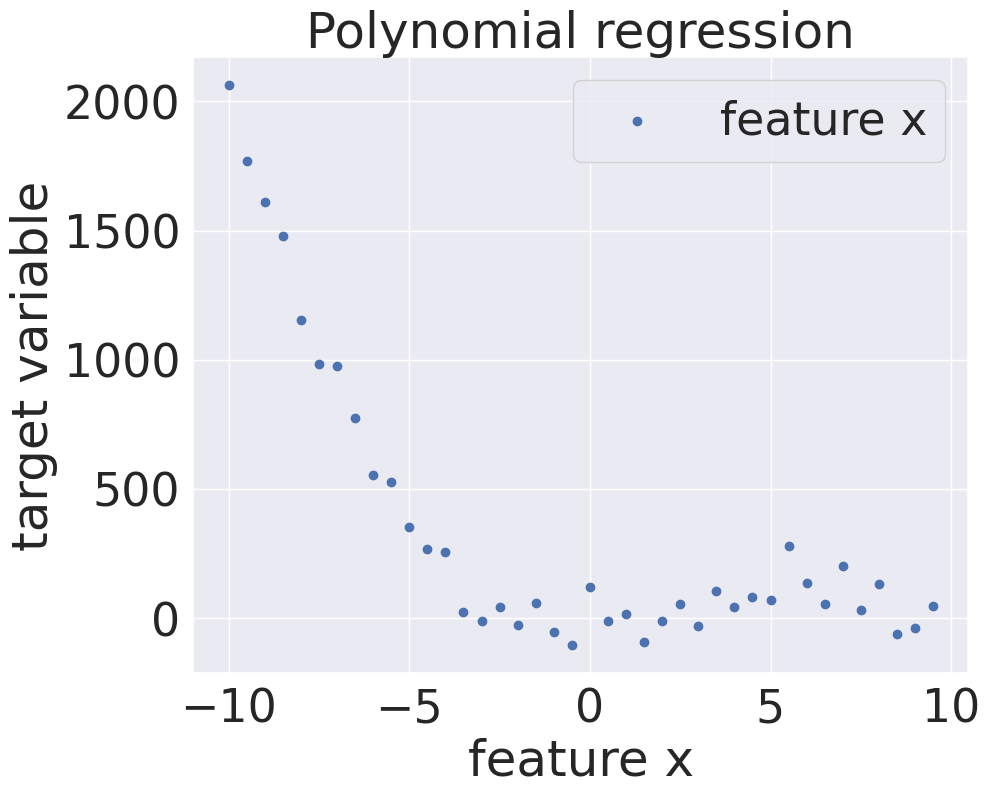

In [9]:
plt.figure(figsize=(10,8))
plt.title('Polynomial regression')
plt.xlabel('feature x')
plt.ylabel('target variable')
plt.scatter(X, y, label='feature x')
plt.legend()
plt.show()

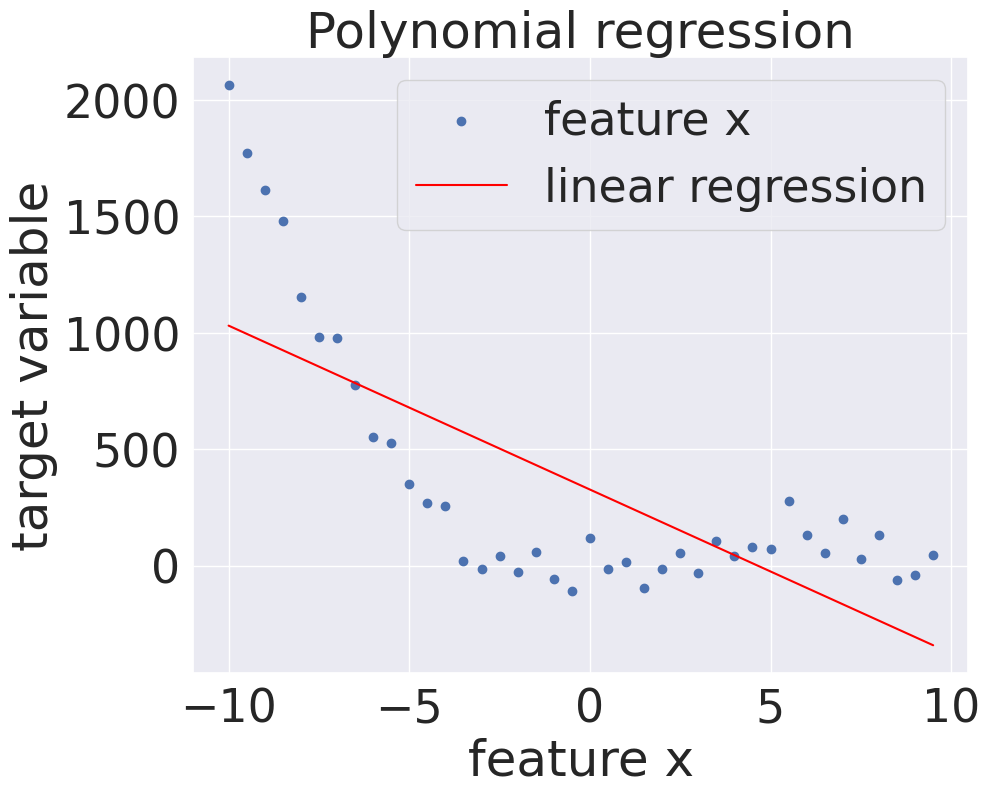

In [10]:
## Linear model
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X, y)
y_pred_lin = regressor.predict(X)

plt.figure(figsize=(10,8))
plt.title('Polynomial regression')
plt.xlabel('feature x')
plt.ylabel('target variable')
plt.scatter(X, y, label='feature x')
plt.plot(X, y_pred_lin, c='red', label='linear regression')
plt.legend()
plt.show()

In [11]:
from sklearn.metrics import r2_score

r2_score(y, y_pred_lin)

0.5342822962632471

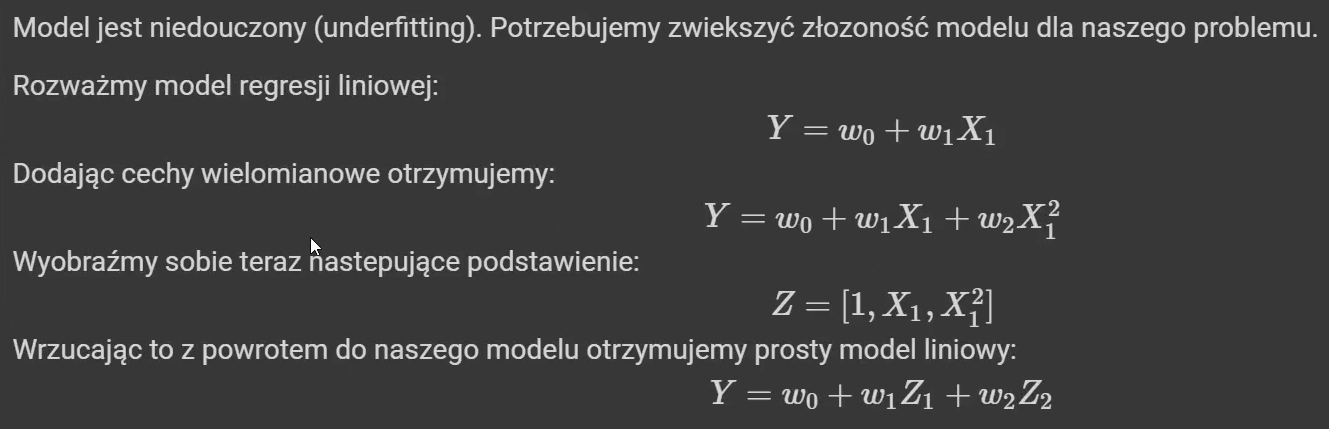

In [12]:
## extraction of polynomial features

In [13]:
df = pd.DataFrame(data={'X': X.ravel()})
df.head()

,X
0,-10.0
1,-9.5
2,-9.0
3,-8.5
4,-8.0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       40 non-null     float64
dtypes: float64(1)
memory usage: 452.0 bytes


In [15]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)

X_poly = poly.fit_transform(X)
X_poly

array([[  1.  , -10.  , 100.  ],
       [  1.  ,  -9.5 ,  90.25],
       [  1.  ,  -9.  ,  81.  ],
       [  1.  ,  -8.5 ,  72.25],
       [  1.  ,  -8.  ,  64.  ],
       [  1.  ,  -7.5 ,  56.25],
       [  1.  ,  -7.  ,  49.  ],
       [  1.  ,  -6.5 ,  42.25],
       [  1.  ,  -6.  ,  36.  ],
       [  1.  ,  -5.5 ,  30.25],
       [  1.  ,  -5.  ,  25.  ],
       [  1.  ,  -4.5 ,  20.25],
       [  1.  ,  -4.  ,  16.  ],
       [  1.  ,  -3.5 ,  12.25],
       [  1.  ,  -3.  ,   9.  ],
       [  1.  ,  -2.5 ,   6.25],
       [  1.  ,  -2.  ,   4.  ],
       [  1.  ,  -1.5 ,   2.25],
       [  1.  ,  -1.  ,   1.  ],
       [  1.  ,  -0.5 ,   0.25],
       [  1.  ,   0.  ,   0.  ],
       [  1.  ,   0.5 ,   0.25],
       [  1.  ,   1.  ,   1.  ],
       [  1.  ,   1.5 ,   2.25],
       [  1.  ,   2.  ,   4.  ],
       [  1.  ,   2.5 ,   6.25],
       [  1.  ,   3.  ,   9.  ],
       [  1.  ,   3.5 ,  12.25],
       [  1.  ,   4.  ,  16.  ],
       [  1.  ,   4.5 ,  20.25],
       [  

In [16]:
X_poly.shape

(40, 3)

In [17]:
df = pd.DataFrame(X_poly)
df.columns = ['1','x','x**2']
df.head(8)

,1,x,x**2
0,1.0,-10.0,100.00
1,1.0,-9.5,90.25
2,1.0,-9.0,81.00
3,1.0,-8.5,72.25
4,1.0,-8.0,64.00
5,1.0,-7.5,56.25
6,1.0,-7.0,49.00
7,1.0,-6.5,42.25


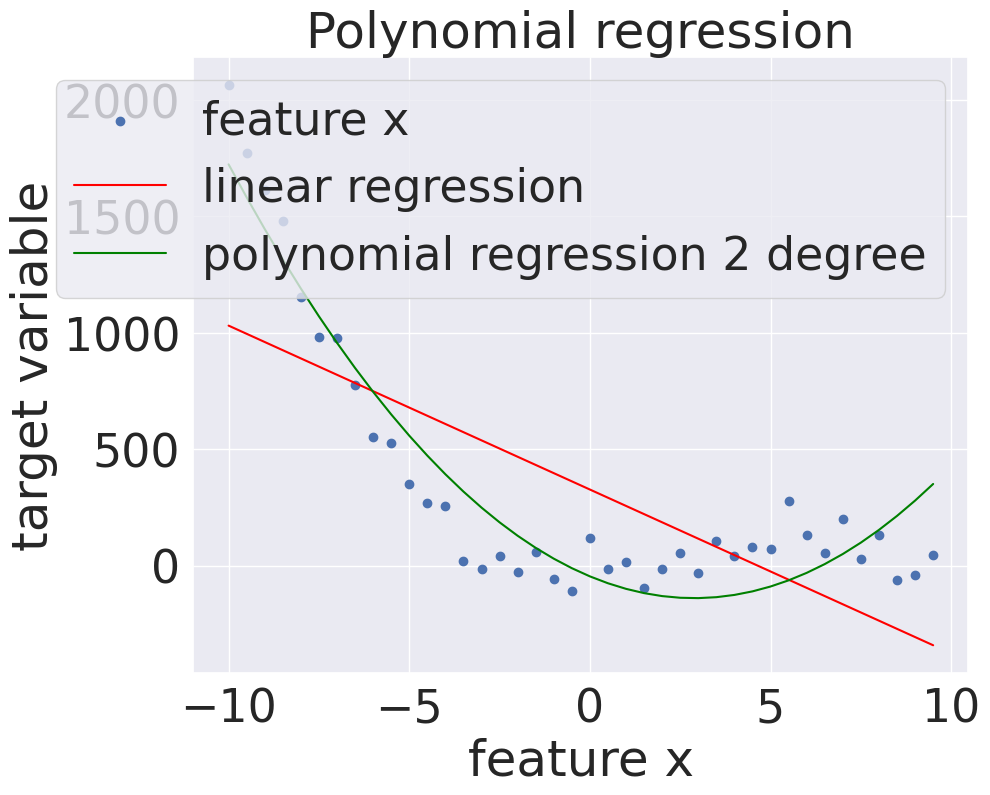

In [18]:
regressor_poly = LinearRegression()
regressor_poly.fit(X_poly, y)

y_pred_2 = regressor_poly.predict(X_poly)

plt.figure(figsize=(10,8))
plt.title('Polynomial regression')
plt.xlabel('feature x')
plt.ylabel('target variable')
plt.scatter(X, y, label='feature x')
plt.plot(X, y_pred_lin, c='red', label='linear regression')
plt.plot(X, y_pred_2, c='green', label='polynomial regression 2 degree')
plt.legend()
plt.show()

In [19]:
r2_score(y, y_pred_2)

0.8951163003458433

In [20]:
## extraction of polynomial features - 3 degree

In [21]:
poly = PolynomialFeatures(degree=3)

X_poly_3 = poly.fit_transform(X)
X_poly_3

array([[    1.   ,   -10.   ,   100.   , -1000.   ],
       [    1.   ,    -9.5  ,    90.25 ,  -857.375],
       [    1.   ,    -9.   ,    81.   ,  -729.   ],
       [    1.   ,    -8.5  ,    72.25 ,  -614.125],
       [    1.   ,    -8.   ,    64.   ,  -512.   ],
       [    1.   ,    -7.5  ,    56.25 ,  -421.875],
       [    1.   ,    -7.   ,    49.   ,  -343.   ],
       [    1.   ,    -6.5  ,    42.25 ,  -274.625],
       [    1.   ,    -6.   ,    36.   ,  -216.   ],
       [    1.   ,    -5.5  ,    30.25 ,  -166.375],
       [    1.   ,    -5.   ,    25.   ,  -125.   ],
       [    1.   ,    -4.5  ,    20.25 ,   -91.125],
       [    1.   ,    -4.   ,    16.   ,   -64.   ],
       [    1.   ,    -3.5  ,    12.25 ,   -42.875],
       [    1.   ,    -3.   ,     9.   ,   -27.   ],
       [    1.   ,    -2.5  ,     6.25 ,   -15.625],
       [    1.   ,    -2.   ,     4.   ,    -8.   ],
       [    1.   ,    -1.5  ,     2.25 ,    -3.375],
       [    1.   ,    -1.   ,     1.   ,    -1

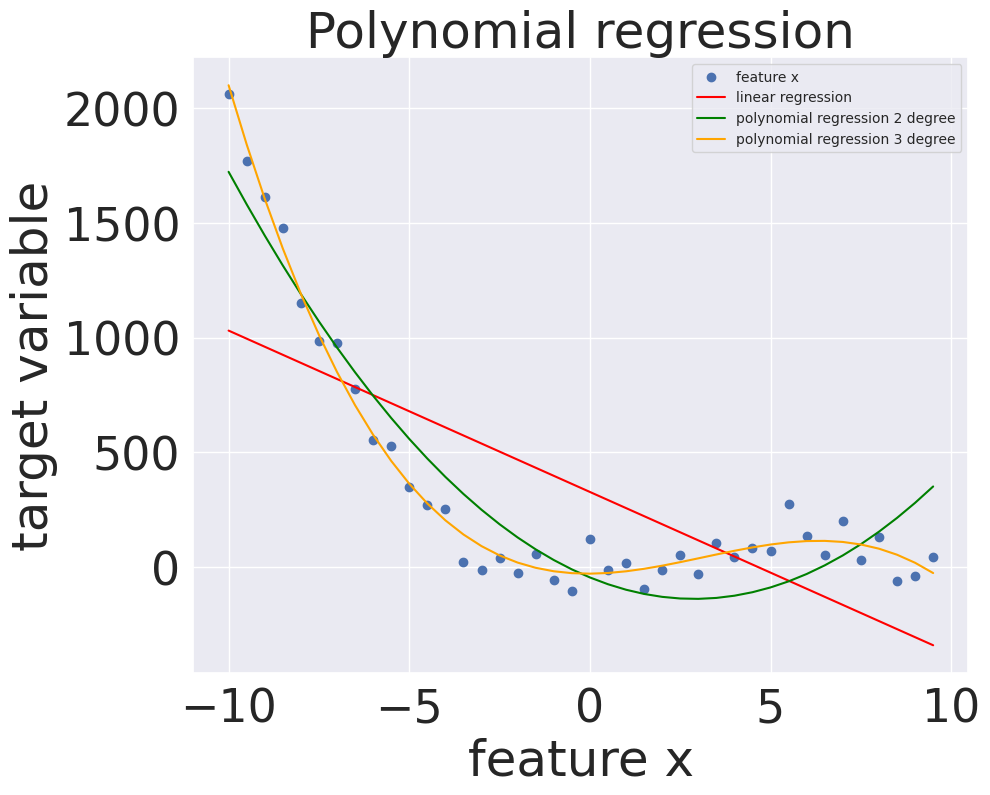

In [22]:
regressor_poly_3 = LinearRegression()
regressor_poly_3.fit(X_poly_3, y)

y_pred_3 = regressor_poly_3.predict(X_poly_3)

plt.figure(figsize=(10,8))
plt.title('Polynomial regression')
plt.xlabel('feature x')
plt.ylabel('target variable')
plt.scatter(X, y, label='feature x')
plt.plot(X, y_pred_lin, c='red', label='linear regression')
plt.plot(X, y_pred_2, c='green', label='polynomial regression 2 degree')
plt.plot(X, y_pred_3, c='orange', label='polynomial regression 3 degree')
plt.legend(fontsize=10)
plt.show()

In [23]:
r2_score(y, y_pred_3)

0.9841708613657418

In [24]:
r2_score(y, y_pred_lin)

0.5342822962632471

In [25]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse

In [26]:
results = pd.DataFrame(data={
    'name': ['linear regression', 'polynomial regression dg. 2', 'polynomial regression dg. 3'],
    'r2_score': [r2_score(y, y_pred_lin), r2_score(y, y_pred_2), r2_score(y, y_pred_3)],
    'mae': [mae(y, y_pred_lin), mae(y, y_pred_2), mae(y, y_pred_3)],
    'mse': [mse(y, y_pred_lin), mse(y, y_pred_2), mse(y, y_pred_3)],
    'rmse': [np.sqrt(mse(y, y_pred_lin)), np.sqrt(mse(y, y_pred_2)), np.sqrt(mse(y, y_pred_3))]
    })
results

,name,r2_score,mae,mse,rmse
0,linear regression,0.534282,316.267126,143775.153332,379.176942
1,polynomial regression dg. 2,0.895116,155.977929,32379.421866,179.942829
2,polynomial regression dg. 3,0.984171,57.572030,4886.730343,69.905152


In [27]:
px.bar(results, x='name', y='r2_score', width=700, title='Polynomial regression - R2_score')

In [28]:
px.bar(results, x='name', y='mae', width=700, title='Polynomial regression - mean absolute error')

In [29]:
px.bar(results, x='name', y='mse', width=700, title='Polynomial regression - mean squared error')

In [30]:
px.bar(results, x='name', y='rmse', width=700, title='Polynomial regression - root mean squared error')